In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from quant_met.bcs import find_fixpoint
from quant_met import hamiltonians
from quant_met import plotting

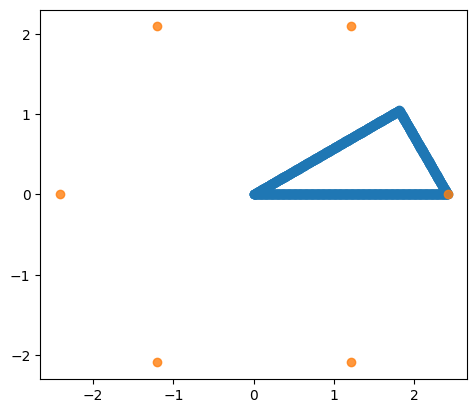

In [2]:
lattice_constant = np.sqrt(3)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

Gamma = np.array([0, 0])
M = np.pi / lattice_constant * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * lattice_constant) * np.array([1, 0])

points = [(M, 'M'), (Gamma, r'\Gamma'), (all_K_points[1], 'K')]

band_path, band_path_plot, ticks, labels = plotting.generate_bz_path(points, number_of_points=1000)

BZ_path_plot = plotting.plot_into_bz(all_K_points, band_path)

graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=-1, U_gr=1)

band_structure = graphene_h.calculate_bandstructure(band_path)

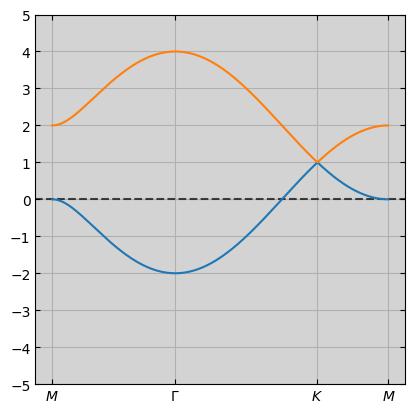

In [3]:
band_structure_fig = plotting.plot_nonint_bandstructure(
    bands=band_structure[['band_0', 'band_1']].to_numpy().T,
    k_point_list=band_path_plot,
    labels=labels,
    ticks=ticks
)

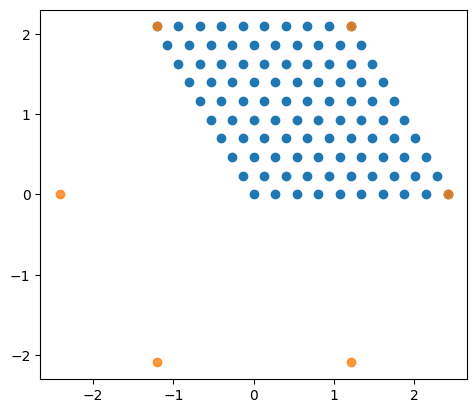

In [4]:
BZ_grid = find_fixpoint.generate_k_space_grid(10, 10, all_K_points[1], all_K_points[5])
BZ_grid_plot = plotting.plot_into_bz(all_K_points, BZ_grid)

Time taken to solve the gap equation: 0.85 seconds


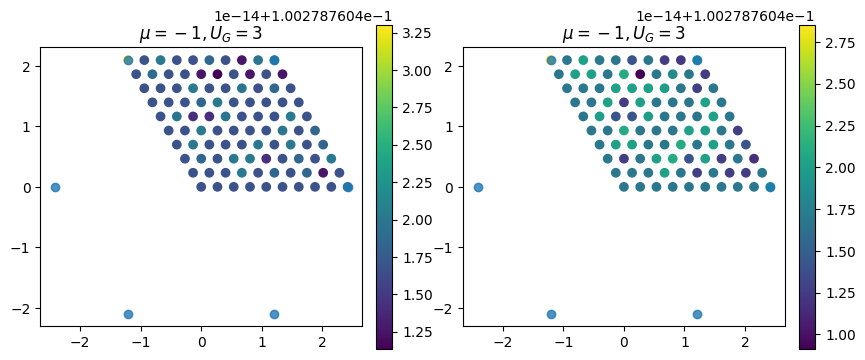

In [5]:
import time

start = time.time()
graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=-1, U_gr=3)
delta = find_fixpoint.solve_gap_equation(graphene_h, BZ_grid)
end = time.time()
print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')

delta_interpolated = find_fixpoint.interpolate_gap(delta, band_path)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 5))

for delta, ax in zip(delta.data[['delta_0', 'delta_1']].to_numpy().T, axs):
    ax.set_title(f"$\\mu = {graphene_h.mu}, U_G = {graphene_h.U_gr}$")
    plotting.scatter_into_bz(all_K_points, BZ_grid, delta, fig=fig, ax=ax)

Time taken to solve the gap equation: 1.07 seconds
Time taken to solve the gap equation: 12.20 seconds
Time taken to solve the gap equation: 15.85 seconds
Time taken to solve the gap equation: 75.71 seconds
Time taken to solve the gap equation: 24.48 seconds
Failed
Time taken to solve the gap equation: 121.10 seconds
Time taken to solve the gap equation: 1.44 seconds
Time taken to solve the gap equation: 1.46 seconds
Time taken to solve the gap equation: 1.92 seconds
Time taken to solve the gap equation: 1.71 seconds


Text(0.5, 0, 'U/t')

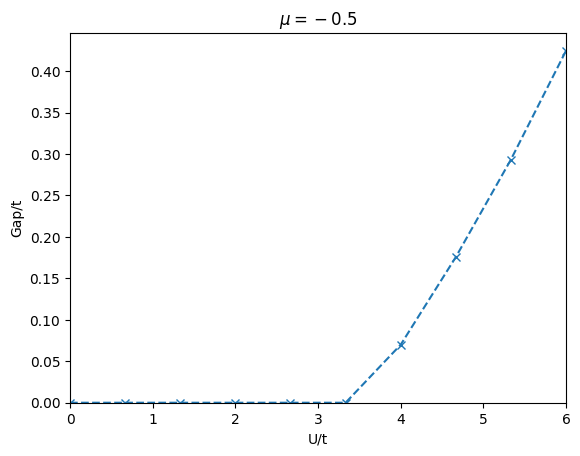

In [8]:
delta_over_U = []

U_range = np.linspace(start=0, stop=6, num=10)

for U in U_range:
    graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=-0.5, U_gr=U)

    start = time.time()
    delta = find_fixpoint.solve_gap_equation(graphene_h, BZ_grid)
    end = time.time()
    print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
    delta_over_U.append(delta.data.loc[0, 'delta_1'])

plt.title(f'$\\mu = {graphene_h.mu}$')
plt.plot(U_range, np.abs(delta_over_U), 'x--')
plt.ylim(bottom=0)
plt.xlim(left=0, right=6)
plt.ylabel("Gap/t")
plt.xlabel("U/t")

Time taken to solve the gap equation: 0.87 seconds
Time taken to solve the gap equation: 8.19 seconds
Time taken to solve the gap equation: 24.29 seconds
Time taken to solve the gap equation: 71.49 seconds
Time taken to solve the gap equation: 56.24 seconds
Time taken to solve the gap equation: 1.69 seconds
Time taken to solve the gap equation: 1.22 seconds
Time taken to solve the gap equation: 1.47 seconds
Time taken to solve the gap equation: 1.47 seconds
Time taken to solve the gap equation: 1.46 seconds


Text(0.5, 0, 'U/t')

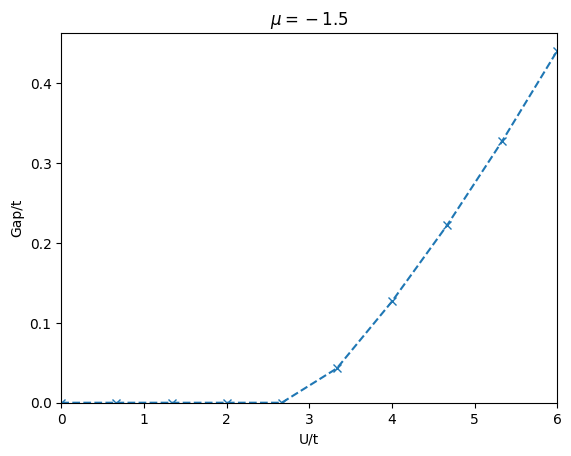

In [9]:
delta_over_U = []

U_range = np.linspace(start=0, stop=6, num=10)

for U in U_range:
    graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=-1.5, U_gr=U)

    start = time.time()
    delta = find_fixpoint.solve_gap_equation(graphene_h, BZ_grid)
    end = time.time()
    print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
    delta_over_U.append(delta.data.loc[0, 'delta_1'])

plt.title(f'$\\mu = {graphene_h.mu}$')
plt.plot(U_range, np.abs(delta_over_U), 'x--')
plt.ylim(bottom=0)
plt.xlim(left=0, right=6)
plt.ylabel("Gap/t")
plt.xlabel("U/t")

Time taken to solve the gap equation: 0.81 seconds
Time taken to solve the gap equation: 0.74 seconds
Time taken to solve the gap equation: 0.75 seconds
Time taken to solve the gap equation: 0.99 seconds
Time taken to solve the gap equation: 0.98 seconds
Time taken to solve the gap equation: 0.99 seconds
Time taken to solve the gap equation: 0.97 seconds
Time taken to solve the gap equation: 0.96 seconds
Time taken to solve the gap equation: 1.20 seconds
Time taken to solve the gap equation: 1.44 seconds


Text(0.5, 0, 'U/t')

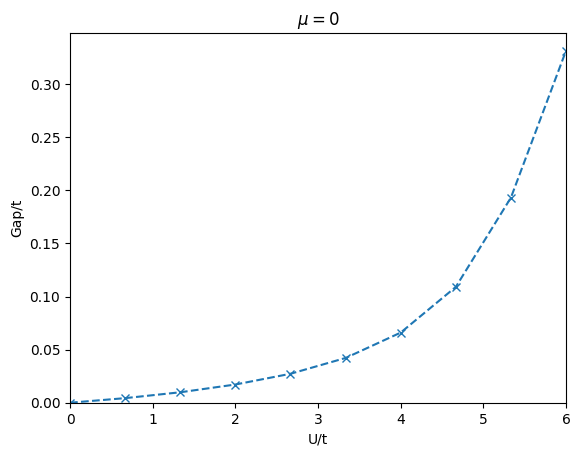

In [10]:
delta_over_U = []

U_range = np.linspace(start=0, stop=6, num=10)

for U in U_range:
    graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=0, U_gr=U)

    start = time.time()
    delta = find_fixpoint.solve_gap_equation(graphene_h, BZ_grid)
    end = time.time()
    print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
    delta_over_U.append(delta.data.loc[0, 'delta_1'])

plt.title(f'$\\mu = {graphene_h.mu}$')
plt.plot(U_range, np.abs(delta_over_U), 'x--')
plt.ylim(bottom=0)
plt.xlim(left=0, right=6)
plt.ylabel("Gap/t")
plt.xlabel("U/t")
